### Importing the required Libraraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading the data

In [2]:
df = pd.read_csv('Fuel_Consumption.csv')
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


### Exploring data - EDA

In [44]:
df.drop('COMB (L/100 km)', axis = 1, inplace = True)

In [45]:
df.describe(include = 'all')

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556,22556,22556,22556.000000,22556.000000,22556,22556,22556.000000,22556.000000,22556.000000,22556.000000
unique,NaN,87,4242,32,NaN,NaN,30,5,NaN,NaN,NaN,NaN
top,NaN,CHEVROLET,JETTA,SUV,NaN,NaN,A4,X,NaN,NaN,NaN,NaN
freq,NaN,1725,89,2640,NaN,NaN,3519,11822,NaN,NaN,NaN,NaN
mean,2011.554442,NaN,NaN,NaN,3.356646,5.854141,NaN,NaN,12.763513,8.919126,27.374534,250.068452
std,6.298269,NaN,NaN,NaN,1.335425,1.819597,NaN,NaN,3.500999,2.274764,7.376982,59.355276
min,2000.000000,NaN,NaN,NaN,0.800000,2.000000,NaN,NaN,3.500000,3.200000,11.000000,83.000000
25%,2006.000000,NaN,NaN,NaN,2.300000,4.000000,NaN,NaN,10.400000,7.300000,22.000000,209.000000
50%,2012.000000,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,12.300000,8.400000,27.000000,243.000000
75%,2017.000000,NaN,NaN,NaN,4.200000,8.000000,NaN,NaN,14.725000,10.200000,31.000000,288.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (mpg)        22556 non-null  int64  
 11  EMISSIONS         22556 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


In [47]:
val = [column for column in df.columns if df[column].dtype != 'object']
numerical_df = df[val]

#### Dealing with Numerical Values

Correlation with numerical values

In [68]:
corr_df = numerical_df.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype = bool))
corr_df = corr_df.mask(mask)

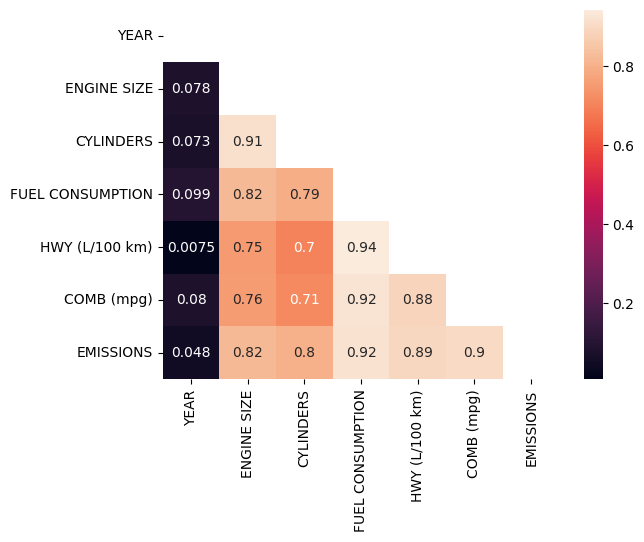

In [70]:
sns.heatmap(corr_df, annot = True)
plt.show()

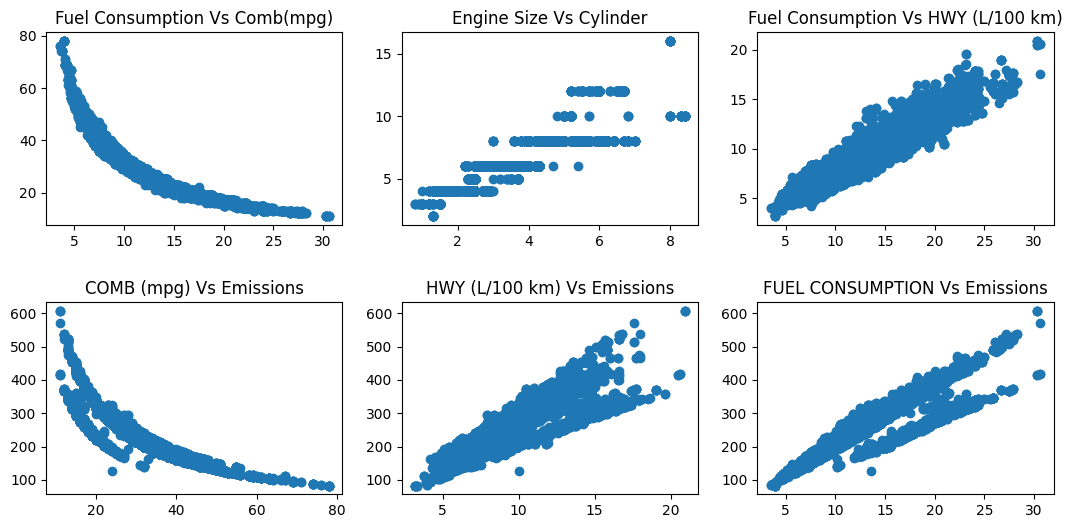

In [71]:
fig = plt.figure(figsize=(13,6))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.2)
axis = gs.subplots()
axis[0,0].scatter(df['FUEL CONSUMPTION'], df['COMB (mpg)'])
axis[0,0].set_title('Fuel Consumption Vs Comb(mpg)')

axis[0,1].scatter(df['ENGINE SIZE'], df['CYLINDERS'])
axis[0,1].set_title('Engine Size Vs Cylinder')

axis[0,2].scatter(df['FUEL CONSUMPTION'], df['HWY (L/100 km)'])
axis[0,2].set_title('Fuel Consumption Vs HWY (L/100 km)')

axis[1,0].scatter(df['COMB (mpg)'], df['EMISSIONS'])
axis[1,0].set_title('COMB (mpg) Vs Emissions')

axis[1,1].scatter(df['HWY (L/100 km)'], df['EMISSIONS'])
axis[1,1].set_title('HWY (L/100 km) Vs Emissions')

axis[1,2].scatter(df['FUEL CONSUMPTION'], df['EMISSIONS'])
axis[1,2].set_title('FUEL CONSUMPTION Vs Emissions')

plt.show()

In [74]:
cdf = df[['ENGINE SIZE','CYLINDERS','COMB (mpg)','EMISSIONS']]

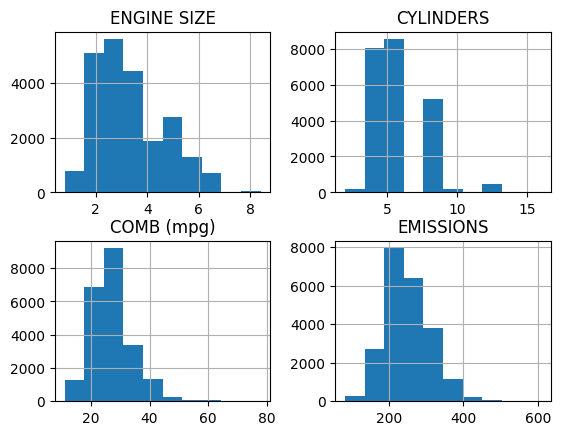

In [76]:
cdf.hist()
plt.show()

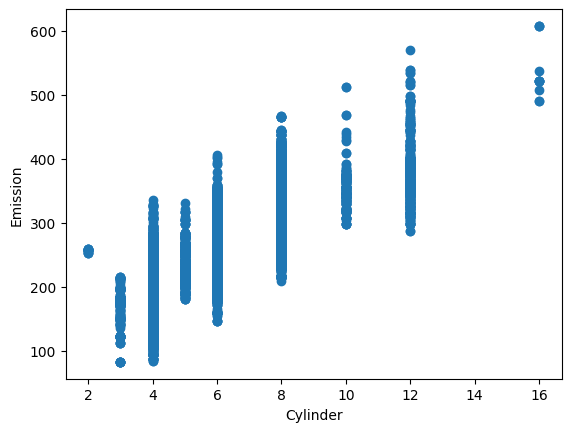

In [77]:
plt.scatter(cdf.CYLINDERS, cdf.EMISSIONS)
plt.xlabel('Cylinder')
plt.ylabel('Emission')
plt.show()

### Splitting Dataset

In [82]:
mask = np.random.rand(len(df)) < 0.8
train =  cdf[mask]
test = cdf[~mask]

In [86]:
xtrain = np.asanyarray(train[['ENGINE SIZE']])
ytrain = np.asanyarray(train[['EMISSIONS']])

In [98]:
xtrain1 = np.asanyarray(train[['CYLINDERS']])

In [102]:
xtrain2 = np.asanyarray(train[['COMB (mpg)']])

### Linear Regression Model

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[36.29476708]]
Intercept:  [128.01979198]


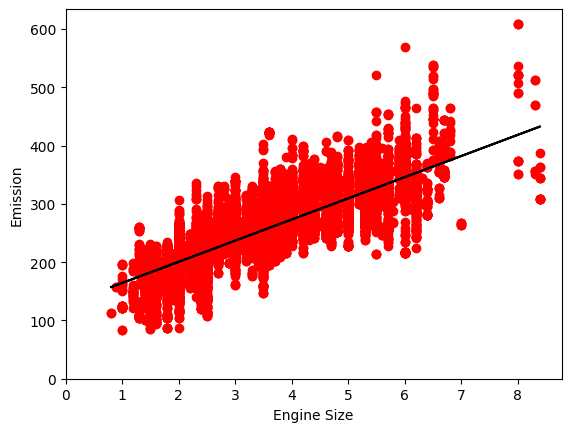

In [92]:
plt.scatter(train['ENGINE SIZE'], train['EMISSIONS'], color = 'red')
plt.plot(xtrain, model.intercept_[0]+model.coef_[0][0]*xtrain, color = 'black')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.ylim(0,)
plt.xlim(0,)
plt.show()

In [99]:
model1 = LinearRegression()
model1.fit(xtrain1, ytrain)
print ('Coefficients: ', model1.coef_)
print ('Intercept: ',model1.intercept_)

Coefficients:  [[26.07104635]]
Intercept:  [97.22766421]


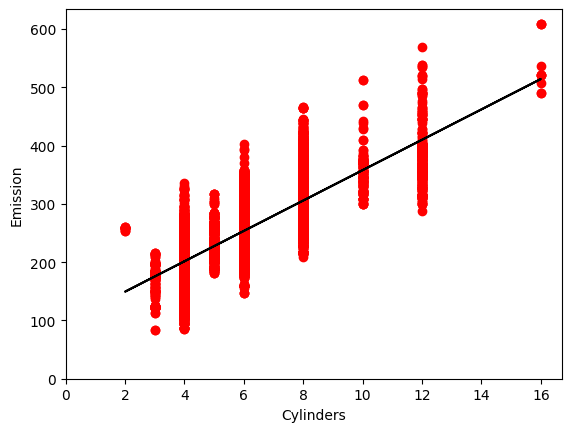

In [100]:
plt.scatter(train['CYLINDERS'], train['EMISSIONS'], color = 'red')
plt.plot(xtrain1, model1.intercept_[0]+model1.coef_[0][0]*xtrain1, color = 'black')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.ylim(0,)
plt.xlim(0,)
plt.show()

In [103]:
model2 = LinearRegression()
model2.fit(xtrain2, ytrain)
print ('Coefficients: ', model2.coef_)
print ('Intercept: ',model2.intercept_)

Coefficients:  [[-7.25139443]]
Intercept:  [448.57492061]


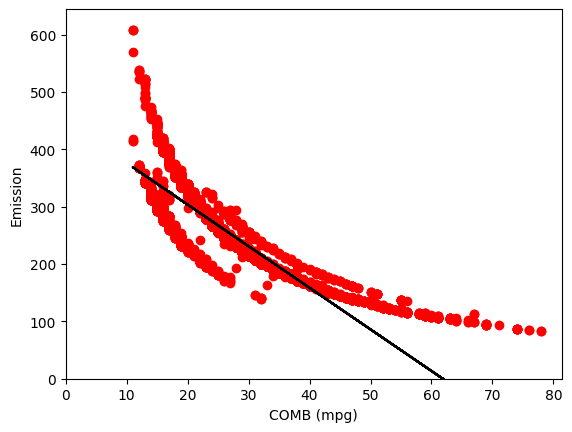

In [105]:
plt.scatter(train['COMB (mpg)'], train['EMISSIONS'], color = 'red')
plt.plot(xtrain2, model2.intercept_[0]+model2.coef_[0][0]*xtrain2, color = 'black')
plt.xlabel('COMB (mpg)')
plt.ylabel('Emission')
plt.ylim(0,)
plt.xlim(0,)
plt.show()

### Evaluation

In [94]:
from sklearn.metrics import r2_score

In [95]:
xtest = np.asanyarray(test[['ENGINE SIZE']])
ytest = np.asanyarray(test[['EMISSIONS']])
prediction = model.predict(xtest)

In [97]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - ytest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - ytest) ** 2))
print("R2-score: %.2f" % r2_score(ytest, prediction) )

Mean absolute error: 25.48
Residual sum of squares (MSE): 1112.81
R2-score: 0.68


In [101]:
xtest1 = np.asanyarray(test[['CYLINDERS']])
prediction1 = model1.predict(xtest1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction1 - ytest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction1 - ytest) ** 2))
print("R2-score: %.2f" % r2_score(ytest, prediction1) )

Mean absolute error: 27.48
Residual sum of squares (MSE): 1246.70
R2-score: 0.65


In [106]:
xtest2 = np.asanyarray(test[['COMB (mpg)']])
prediction2 = model2.predict(xtest2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - ytest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - ytest) ** 2))
print("R2-score: %.2f" % r2_score(ytest, prediction2) )

Mean absolute error: 17.06
Residual sum of squares (MSE): 666.98
R2-score: 0.81
